### This script is designed to take in position and beacon data, find indexes of beacons. then add them all in a large numpy set and create a new list where the last position is substraced from each of them and then plots these trajecotries, which can be seperated to visible and invisible ones.   

#### 1. load sample position and beacon data, get index times when beacon trigered. - more imports at the bottom.

In [1]:
import math
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

root = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Data/Raw/'
figures = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Figures/'

Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)


In [2]:
beacon_data = beacon_Day86_fs1
position_data = Day86_fs1


In [3]:
enum = list(np.arange(0,len(beacon_data [0]),1))
index=[]
beacon_times = np.array(beacon_data[0])
print(enum)
for i in enum:
    index.append(np.abs(beacon_times[i]-np.array(position_data[0])).argmin() )
print (index) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[418, 5267, 5871, 7564, 8020, 12141, 12587, 19047, 23102, 23321, 34878, 36731, 37660, 37940, 39351, 51921, 52561, 53878, 60705, 61939, 64016, 64546, 65104, 73768, 74188, 74419, 76498, 79101, 80279, 93151, 94459, 99261, 102101, 104462, 105025]


In [4]:
beacon_data[1][18] #position x during beacon #18

-0.196864411235

#### Make a function out of it

In [5]:
def get_index (beacon_data, position_data):
    """get indexes of beacons and compare to positions """
    enum = list(np.arange(0,len(beacon_data [0]),1))
    index=[]
    beacon_times = np.array(beacon_data[0])
    for i in enum:
        index.append(np.abs(beacon_times[i]-np.array(position_data[0])).argmin() )
    return index ,enum


In [6]:
index, enum  = get_index(beacon_data, position_data)

#### 2. Substarct last number from each of the previous and make a normalized numpy list out of it - all starting from 0 

#### Can take 5 seconds back and after 

In [12]:
seconds_back = 2
x_list=[]
y_list=[]
time_list=[]
for i in index:  

    x_list.append((position_data[1][i-(seconds_back*100):i+(seconds_back*100)])-position_data[1][i])
    y_list.append((position_data[3][i-(seconds_back*100):i+(seconds_back*100)])-position_data[3][i])
    time_list.append((position_data[0][i-(seconds_back*100):i+(seconds_back*100)]))


norm_x = np.asarray(x_list)
norm_y = np.asarray(y_list)
norm_time = np.asarray(time_list)
print(np.shape(norm_x[1]))
print(np.shape(norm_y))

(400,)
(35, 400)


#### Or just 5 seconds before the beacon.

In [10]:
seconds_back =2
x_list=[]
y_list=[]
time_list=[]
for i in index:  
    x_list.append((position_data[1][i-(seconds_back*100):i])-position_data[1][i])
    y_list.append((position_data[2][i-(seconds_back*100):i])-position_data[2][i])
    time_list.append((position_data[0][i-(seconds_back*100):i]))
#make normalized np arrays
norm_x = np.asarray(x_list)
norm_y = np.asarray(y_list)
norm_time = np.asarray(time_list)

print(np.shape(norm_x[1]))
print(np.shape(norm_y))


(200,)
(35, 200)


#### Make into fce

In [39]:
def position_before_beacon_trigger(seconds_back, beacon_data, position_data):
    x_list=[]
    y_list=[]
    time_list=[]
    index, enum  = get_index(beacon_data, position_data)
    for i in index:  
        x_list.append((position_data[1][i-(seconds_back*100):i])-position_data[1][i])
        y_list.append((position_data[3][i-(seconds_back*100):i])-position_data[3][i])
        time_list.append((position_data[0][i-(seconds_back*100):i]))
    #make normalized np arrays
    norm_x = np.asarray(x_list)
    norm_y = np.asarray(y_list)
    norm_time = np.asarray(time_list)
    return norm_x,norm_y,norm_time


In [40]:
norm_x,norm_y,norm_time = position_before_beacon_trigger(2, beacon_data, position_data)

### Possible extension are to look at the height of the animal or the 5 seconds after the fact - the height can be subtracted from the height or just the x - to see the differecne in height better then the normalization 

#### 3. plot the normalized positions 

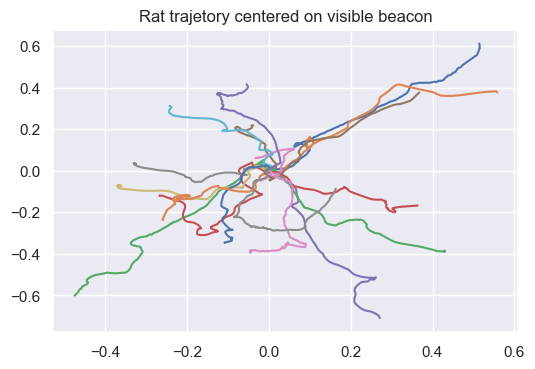

In [41]:
%matplotlib inline
sns.set()
fig, ax = plt.subplots(dpi=100)
for i in enum[::2]:
    ax.plot(norm_x[i],norm_y[i])
ax.set(title= 'Rat trajetory centered on visible beacon') 
plt.savefig('%sRat_trajetory_centered_on_beacon_visible.png' %figures, dpi = 100)

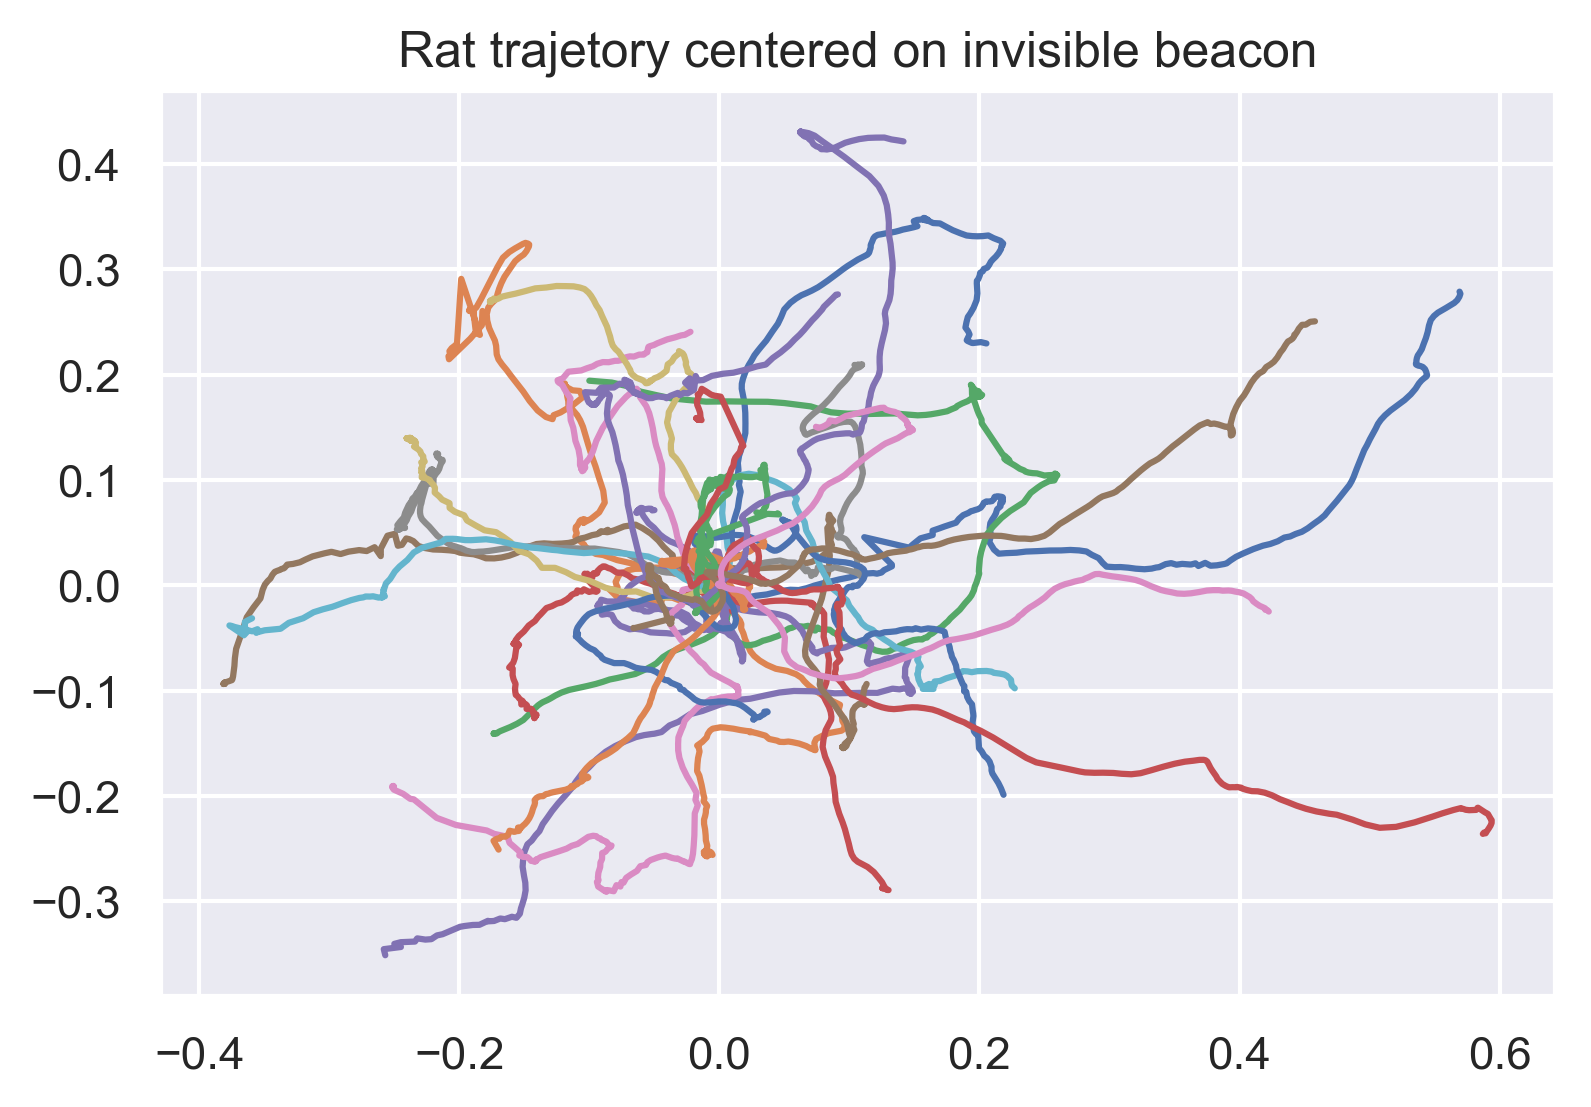

In [169]:
sns.set()
fig, ax = plt.subplots(dpi=300)
for i in enum[1::2]:
    ax.plot(norm_x[i],norm_y[i])
ax.set(title= 'Rat trajetory centered on invisible beacon') 
plt.savefig('%sRat_trajetory_centered_on_beacon_invisible.png' %figures, dpi = 100)

### note: 

##### Here normalized Height is a little harder to interpret, beaue it is normlaized ot a height where they were on each trial as they got the reward so on some trials they can be in low, some in high walk and some in rearing.

#### In between Conclusion: the two distances covered visible and invisible looks very simliar - need to look into more sessions - could be cause as invisibel often counted as visible.

### 4. average distance and speeds per session. 

In [68]:

disteven=[] 
for i in enum[::2]:
    diffsx= np.diff(norm_x[i])
    diffsy= np.diff(norm_y[i])
    dx = np.sqrt(np.square(diffsx) + np.square(diffsy))
    disteven.append(np.sum(dx))
print("distance ran 5 seconds before visile beacon %s m" % int(sum(disteven)))
distodd=[] 
for i in enum[1::2]:
    diffsx= np.diff(norm_x[i])
    diffsy= np.diff(norm_y[i])
    dx = np.sqrt(np.square(diffsx) + np.square(diffsy))
    distodd.append(np.sum(dx))
print("distance ran 5 seconds before invisile beacon %s m" %int(sum(distodd)))
speed_even=[]

for i in enum[::2]:
    diffsx= np.diff(norm_x[i])
    diffsy= np.diff(norm_y[i])
    dx = np.sqrt(np.square(diffsx) + np.square(diffsy))
    diffstime= np.diff(norm_time[i])
    speed =  dx/diffstime
    np.nanmedian(speed)
    speed_even.append(np.nanmedian(speed))
even= sum(speed_even[1:])/len(speed_even)    

speed_odd=[]
for i in enum[1::2]:
    diffsx= np.diff(norm_x[i])
    diffsy= np.diff(norm_y[i])
    dx = np.sqrt(np.square(diffsx) + np.square(diffsy))
    diffstime= np.diff(norm_time[i])
    speed =  dx/diffstime
    np.nanmedian(speed)
    speed_odd.append(np.nanmedian(speed))
odd= sum(speed_odd)/len(speed_odd)    
print("median speed 5 seconds before visile beacon %s cm/s" %( int(even*100)))
print ("median speed 5 seconds before invisile beacon %s cm/s" %(int(odd*100)))

distance ran 5 seconds before visile beacon 12 m
distance ran 5 seconds before invisile beacon 10 m
median speed 5 seconds before visile beacon 16 cm/s
median speed 5 seconds before invisile beacon 14 cm/s


In [69]:
def speed_and_distance(norm_x,norm_y,norm_time,enum):
    
    disteven=[] 
    for i in enum[::2]:
        diffsx= np.diff(norm_x[i])
        diffsy= np.diff(norm_y[i])
        dx = np.sqrt(np.square(diffsx) + np.square(diffsy))
        disteven.append(np.sum(dx))
    distodd=[] 
    for i in enum[1::2]:
        diffsx= np.diff(norm_x[i])
        diffsy= np.diff(norm_y[i])
        dx = np.sqrt(np.square(diffsx) + np.square(diffsy))
        distodd.append(np.sum(dx))    
    speed_even=[]

    for i in enum[::2]:
        diffsx= np.diff(norm_x[i])
        diffsy= np.diff(norm_y[i])
        dx = np.sqrt(np.square(diffsx) + np.square(diffsy))
        diffstime= np.diff(norm_time[i])
        speed =  dx/diffstime
        np.nanmedian(speed)
        speed_even.append(np.nanmedian(speed))
    even= sum(speed_even[1:])/len(speed_even)    

    speed_odd=[]
    for i in enum[1::2]:
        diffsx= np.diff(norm_x[i])
        diffsy= np.diff(norm_y[i])
        dx = np.sqrt(np.square(diffsx) + np.square(diffsy))
        diffstime= np.diff(norm_time[i])
        speed =  dx/diffstime
        np.nanmedian(speed)
        speed_odd.append(np.nanmedian(speed))
    odd= sum(speed_odd)/len(speed_odd) 
    dist_even = (sum(disteven)) 
    dist_odd = (sum(distodd))
    speed_even = even*100
    speed_odd = odd*100
    return dist_even,dist_odd,speed_even,speed_odd
speed_and_distance(norm_x,norm_y,norm_time,enum)

(12.21370910671433, 10.050714321750727, 16.26964047108078, 14.982839881976021)

### note: 

### Speed calculated with median filter, but not smoothened out!

### 6. Function that does it all. Need smaller functions first - but plottign in big one.  Here using the full norm function o be abel to use height or not. 

1 seconds in session 86_fs1 showing 35 beacons 


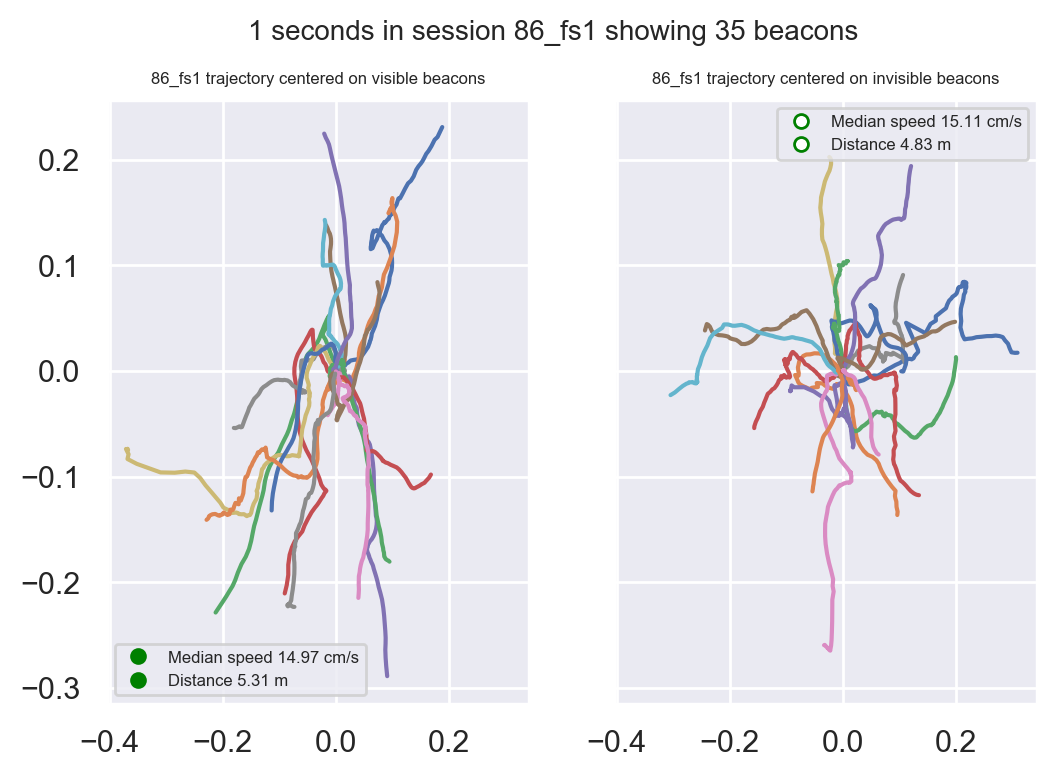

In [70]:
def Beacon_centered_trajectories (session,position_data,beacon_data,seconds_back=2,height=False): 
    """function plots a given amount of seconds before beacon reached and plots centered trajectories  """
    
    index,enum = get_index(beacon_data, position_data)
    
    # conditionals 
   
    if height== False:
        num=3
    else:
        num=2

   #Make list to graph

    
    x_list=[]
    y_list=[]
    time_list=[]
    for i in index: 
        if i <= seconds_back*100:
            i = seconds_back*100+1
            
        x_list.append((position_data[1][i-(seconds_back*100):i])-position_data[1][i])
        y_list.append((position_data[num][i-(seconds_back*100):i])-position_data[num][i])
        time_list.append((position_data[0][i-(seconds_back*100):i]))
    #make normalized np arrays
    norm_x = np.asarray(x_list)
    norm_y = np.asarray(y_list)
    norm_time = np.asarray(time_list)
    
    #distances and speeds 
    dist_even,dist_odd,speed_even,speed_odd= speed_and_distance(norm_x,norm_y,norm_time,enum)
        
    #Graphing 
    
    fig, ax = plt.subplots(1,2,dpi=200,sharey=True,sharex=True)
    
    for i in enum[::2]:
        ax[0].plot(norm_x[i],norm_y[i])
    for i in enum[1::2]:
        ax[1].plot(norm_x[i],norm_y[i])
        
    ax[0].set_title ('%s trajectory centered on visible beacons'%(session), fontsize=6) 
    ax[1].set_title ('%s trajectory centered on invisible beacons'%(session),fontsize=6)
    
    
    distvis = mlines.Line2D([], [], marker='o',markersize=5,markerfacecolor="green",
                            markeredgecolor="green",linewidth = 0, label='Distance %.2f m' %dist_even)
    speedvis = mlines.Line2D([], [], marker='o',markersize=5,markerfacecolor="green",
                            markeredgecolor="green",linewidth = 0, label='Median speed %.2f cm/s' %speed_even)
    distinvis = mlines.Line2D([], [], marker='o',markersize=5,markerfacecolor="white",
                            markeredgecolor="green",linewidth = 0, label='Distance %.2f m' %dist_odd)
    speedinvis = mlines.Line2D([], [], marker='o',markersize=5,markerfacecolor="white",
                            markeredgecolor="green",linewidth = 0, label='Median speed %.2f cm/s' %speed_odd)
        
    ax[0].legend(handles=[speedvis,distvis],loc='best',prop={'size': 6})
    ax[1].legend(handles=[speedinvis,distinvis],loc='best',prop={'size': 6})
    

    fig.suptitle('%s seconds in session %s showing %s beacons '% (seconds_back, session,len(index)), fontsize=10)
    
    print('%s seconds in session %s showing %s beacons '% (seconds_back, session,len(index)))
   
    plt.savefig('%sRat_%ssec.trajetory_centered_on_beacon_%s.png'%(figures,seconds_back,session), dpi = 200)
    plt.show()

Beacon_centered_trajectories ('86_fs1',Day86_fs1,beacon_Day86_fs1,seconds_back=1,height=False)

3 seconds in session 86_fs2 showing 33 beacons 


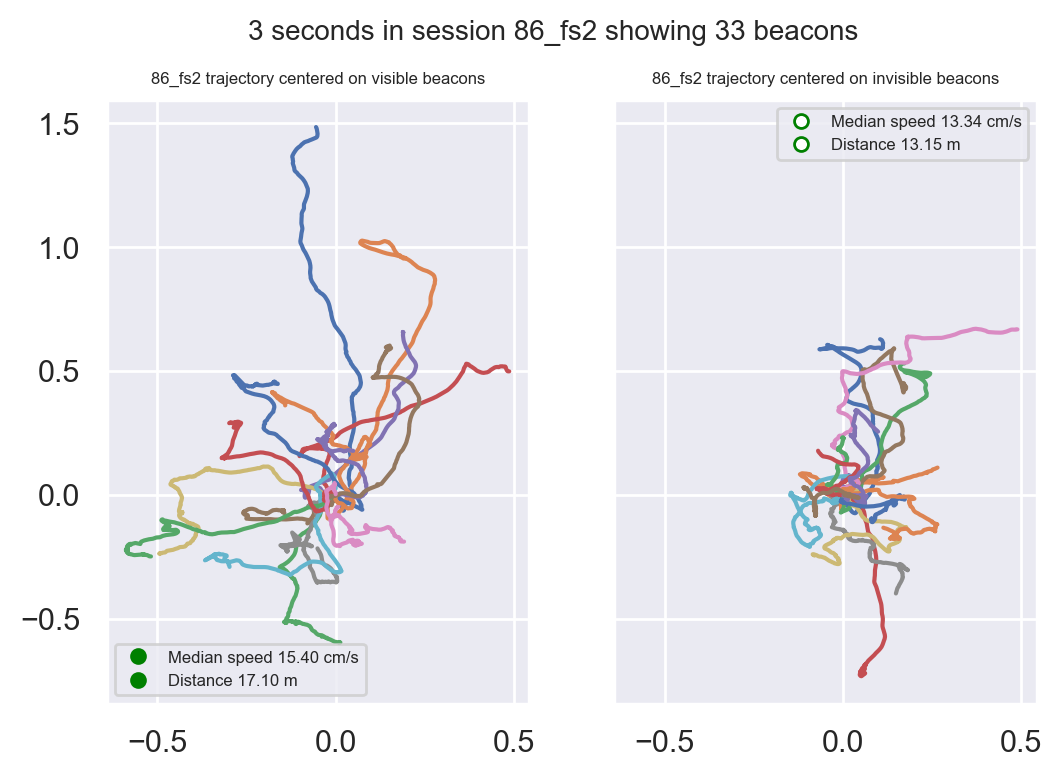

In [28]:
Beacon_centered_trajectories ('86_fs2',Day86_fs2,beacon_Day86_fs2,seconds_back=3,height=False)

3 seconds in session 87_fs1 showing 17 beacons 


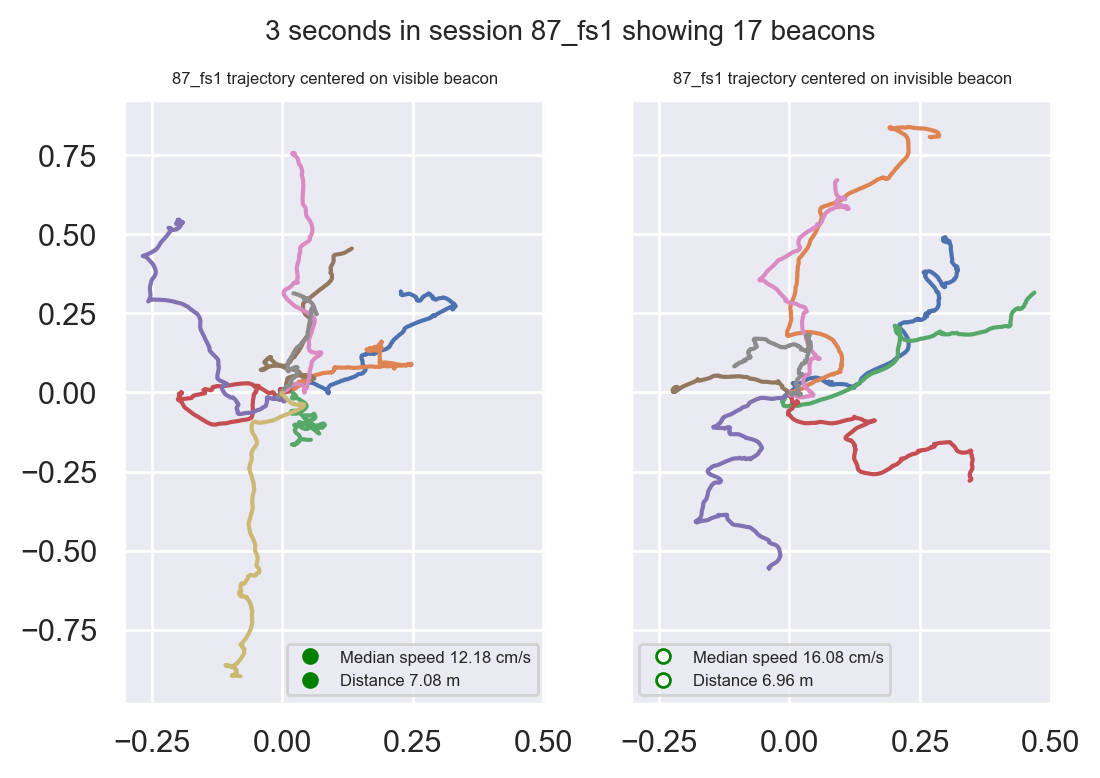

In [458]:
Beacon_centered_trajectories ('87_fs1',Day87_fs1,beacon_Day87_fs1,seconds_back=3,height=False)

3 seconds in session 87_fs2 showing 33 beacons 


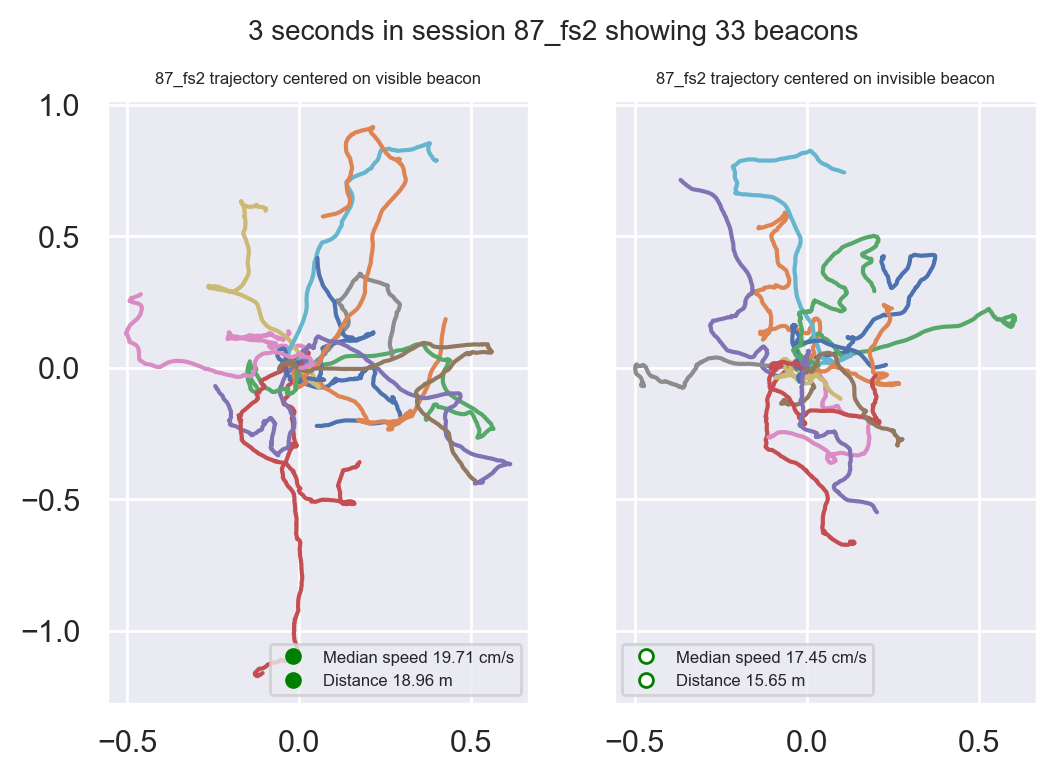

In [459]:
Beacon_centered_trajectories ('87_fs2',Day87_fs2,beacon_Day87_fs2,seconds_back=3,height=False)

3 seconds in session 88_fs2 showing 24 beacons 


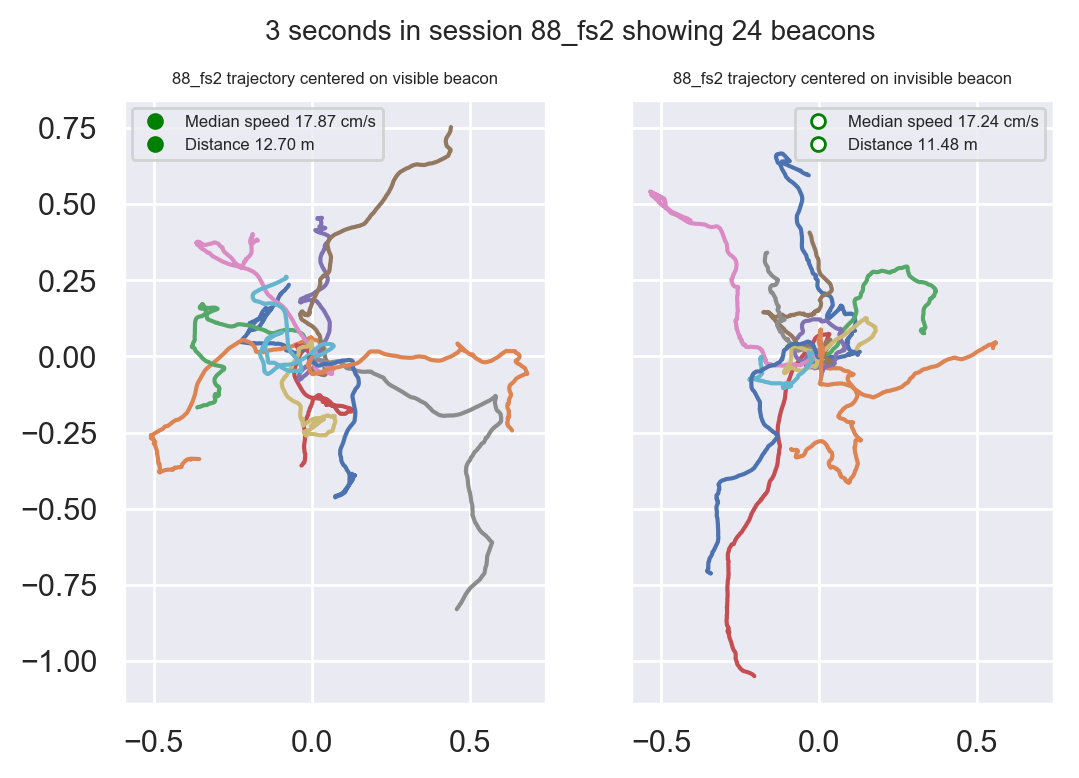

In [460]:
Beacon_centered_trajectories ('88_fs2',Day88_fs2,beacon_Day88_fs2,seconds_back=3,height=False)

3 seconds in session 88_fs1 showing 39 beacons 


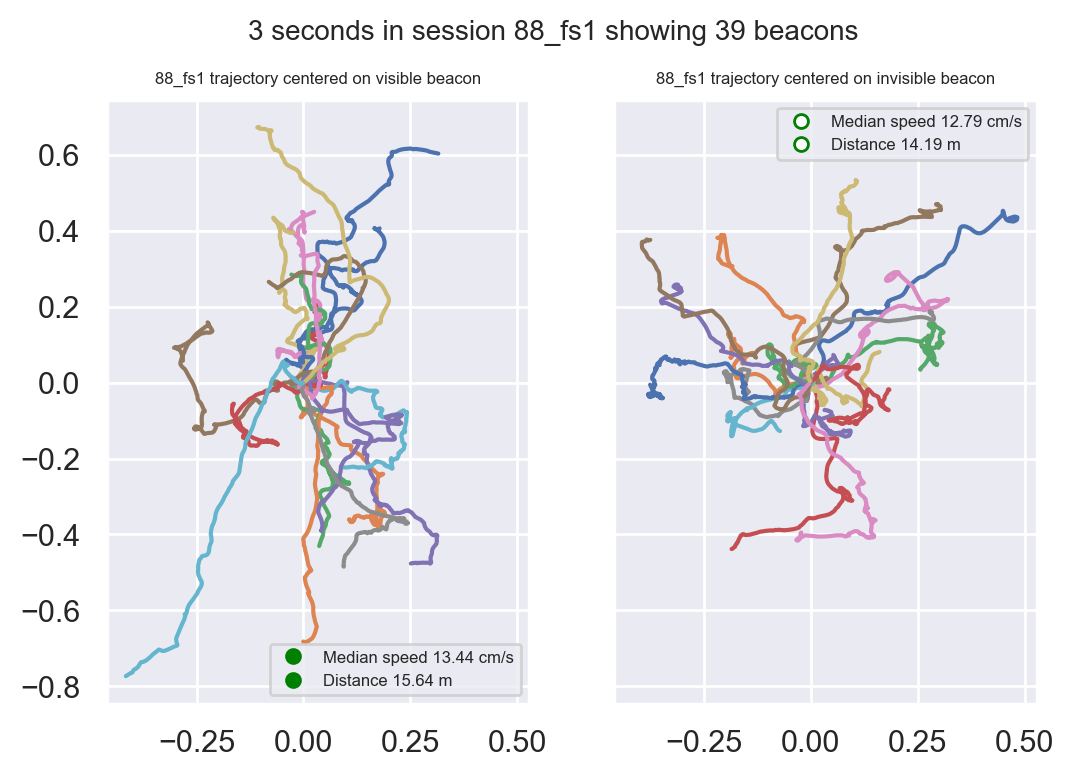

In [461]:
Beacon_centered_trajectories ('88_fs1',Day88_fs1,beacon_Day88_fs1,seconds_back=3,height=False)

### Safety Czechs - go to beacon and compare locations and times with i  - DONE below

### Improvements: 
    Can still make a function to get numpy before. 
    Can also look at height !!
    Can also look at 5 seconds after beaon etc...
        Can also use the beacon position to reveal where they were during beacon trigger - i.e subtract beacon position from the trajectories - SHOULD DO THIS TO LEARN MORE ABOUT BEACON LOC. VS. RAT LOC. - BELOW!!
    Calculate distance run as a function of visible vs invisible - similiar to speed drops, which is already done. 
    

### Need to correct position first - beacons recorded from how position sent, but animals position from how position recieved

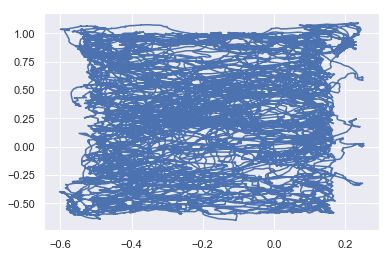

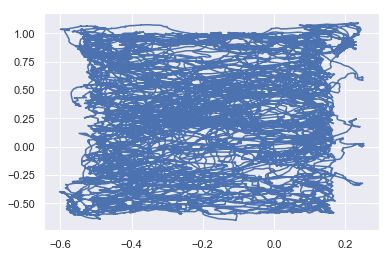

In [147]:
Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)

beacon_data = beacon_Day86_fs1
position_data = Day86_fs1
def rotation_correction(position_data):
    alpha = (5) * np.pi / 180
    position_data[1] = position_data[1] * np.cos(alpha) - position_data[3] * np.sin(alpha)
    position_data[3] = position_data[1] * np.sin(alpha) + position_data[3] * np.cos(alpha)
    rot_position_data = position_data
    return rot_position_data
rot_position_data = rotation_correction(position_data)
plt.plot(position_data[1],position_data[3])
plt.show()
plt.plot(rot_position_data[1],rot_position_data[3])
plt.show()

In [95]:
def position_before_beacon_trigger_beacon_norm(seconds_back, beacon_data, position_data):
    x_list=[]
    y_list=[]
    time_list=[]
    index, enum  = get_index(beacon_data, position_data)
    for index, (i, e) in enumerate(zip(index, enum)):
        x_list.append((position_data[1][i-(seconds_back*100):i])-beacon_data[4][e])
        y_list.append((position_data[3][i-(seconds_back*100):i])-beacon_data[5][e])
        time_list.append((position_data[0][i-(seconds_back*100):i]))
        print (beacon_data[4][e],beacon_data[5][e],beacon_data[1][e],beacon_data[3][e],position_data[1][i], position_data[2][i] )
    #make normalized np arrays
    norm_x = np.asarray(x_list)
    norm_y = np.asarray(y_list)
    norm_time = np.asarray(time_list)
    return norm_x,norm_y,norm_time

In [96]:
norm_x,norm_y,norm_time = position_before_beacon_trigger_beacon_norm (2, beacon_data, position_data)

-0.17744917 -0.52422565 -0.363199949265 -0.44228017330200003 -0.362830489874 0.5596578717230001
-0.17744917 -0.52422565 -0.46171477436999997 -0.314641058445 -0.46171477436999997 0.47211989760399997
-0.17744917 -0.52422565 -0.441410899162 -0.32682782411600003 -0.441410899162 0.6913476586339999
-0.17744917 -0.52422565 -0.270848691463 -0.2622140944 -0.270848691463 0.492691367865
0.19694129 0.5690236999999999 0.122302472591 0.8107649683949999 0.122302472591 0.661942362785
0.19694129 0.5690236999999999 -0.0343863368034 0.797895550728 -0.0340143963695 0.489914774895
0.19694129 0.5690236999999999 0.05916493386030001 0.776036024094 0.05916493386030001 0.641035854816
0.19694129 0.5690236999999999 -0.00176590401679 0.733772516251 -0.0014807330444500002 0.47435995936399994
0.019835085 0.3118453 -0.212172538042 0.595881640911 -0.212172538042 0.564914166927
0.019835085 0.3118453 -0.2053257972 0.45095527172100003 -0.205847278237 0.453622430563
0.019835085 0.3118453 -0.273031949997 0.502942025661 -0.

## Graphing trajecotories, using the beacon position for normalization 

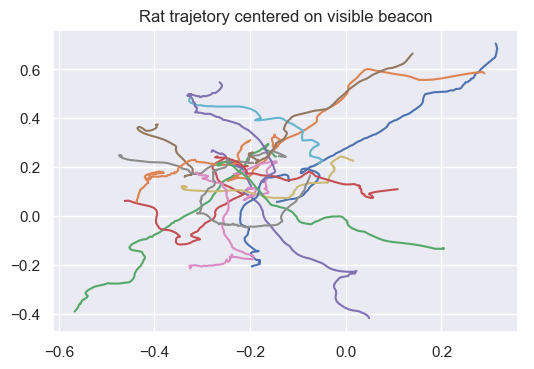

In [150]:
%matplotlib inline
sns.set()
fig, ax = plt.subplots(dpi=100)
for i in enum[::2]:
    ax.plot(norm_x[i],norm_y[i])
ax.set(title= 'Rat trajetory centered on visible beacon') 
plt.savefig('%sRat_trajetory_centered_on_beacon_visible.png' %figures, dpi = 100)

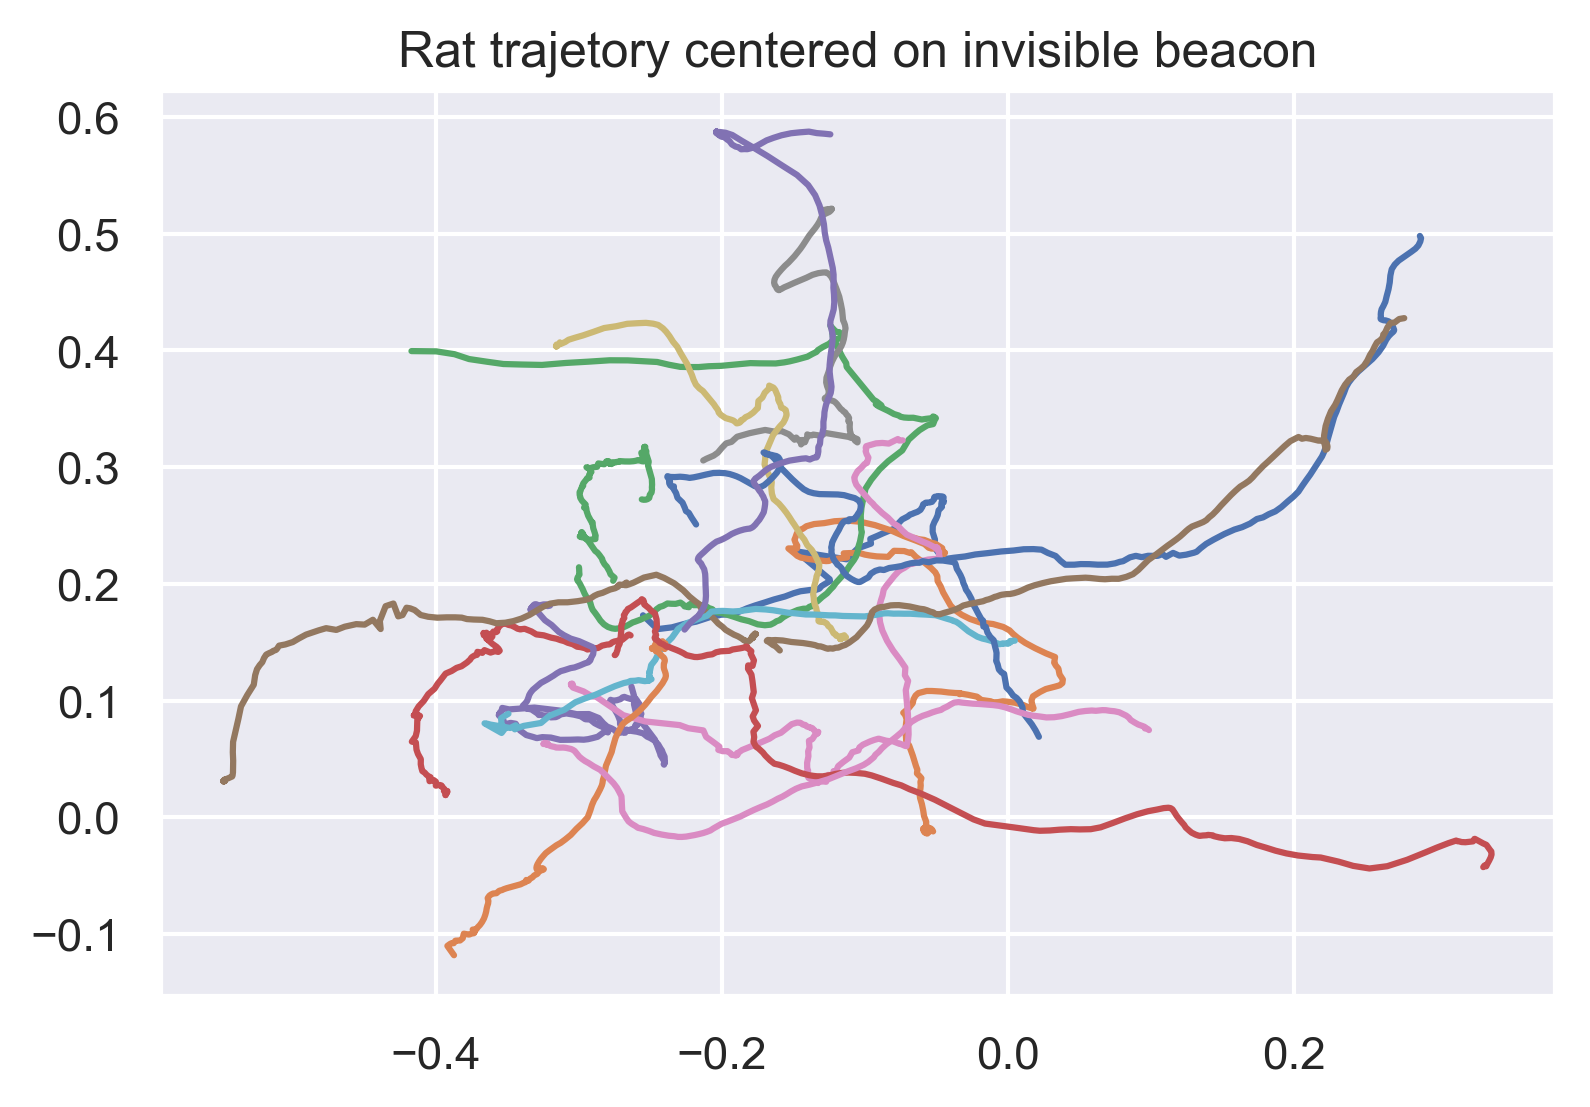

In [151]:
sns.set()
fig, ax = plt.subplots(dpi=300)
for i in enum[1::2]:
    ax.plot(norm_x[i],norm_y[i])
ax.set(title= 'Rat trajetory centered on invisible beacon') 
plt.savefig('%sRat_trajetory_centered_on_beacon_invisible.png' %figures, dpi = 100)

### Maybe would need to correct beacon data for Alpha so it would make more sense ?  - corrected below - 

## Animations - one line at a time 

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
importlib.reload(mpl); importlib.reload(plt); 

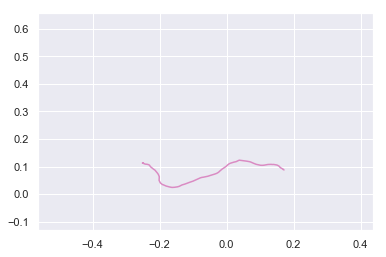

In [97]:
%matplotlib inline
from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML


fig = plt.figure()
camera = Camera(fig)
for i in enum[1::2]:
    plt.plot(norm_x[i],norm_y[i])
    camera.snap()
animation = camera.animate(blit=True, interval=500 ,repeat = True,
                           repeat_delay = 500)#number in msec
HTML(animation.to_html5_video())
animation.save('%sRat_trajetory_centered_on_beacon_visible.gif' %figures, writer = 'pillow')

## Multiple in one

3 seconds in session 87_fs2 showing 33 beacons 


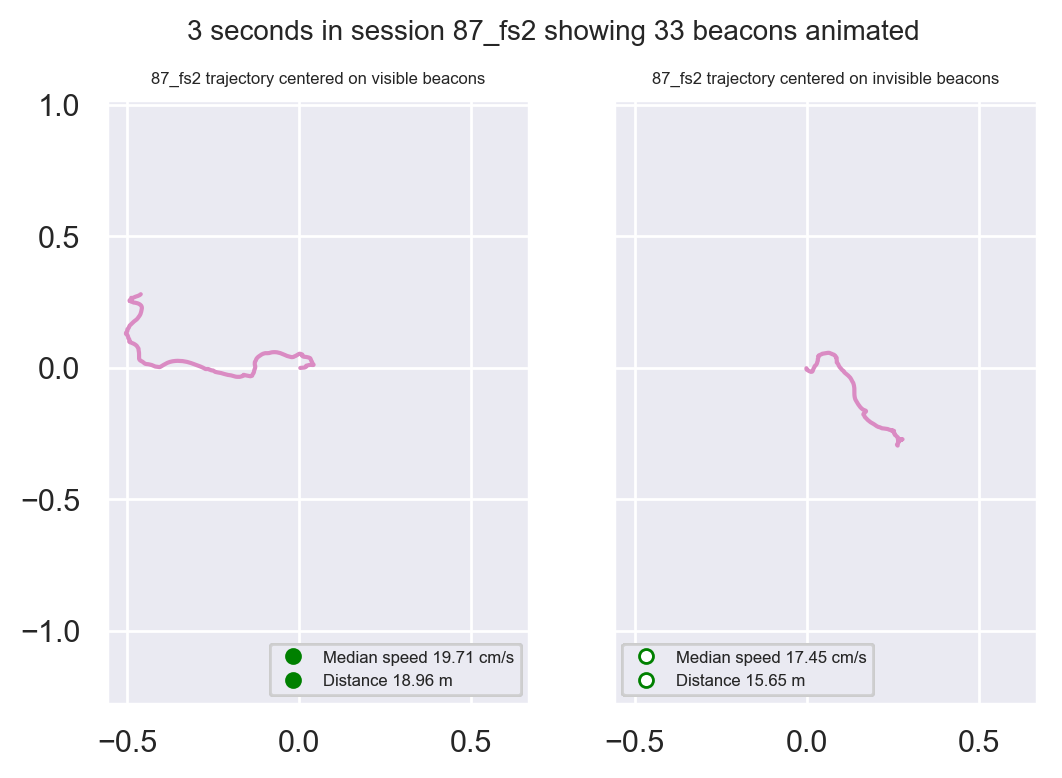

In [93]:
def Beacon_centered_trajectories_animated (session,position_data,beacon_data,seconds_back=2,height=False): 
    """function plots a given amount of seconds before beacon reached and plots centered trajectories  """
    
    index,enum = get_index(beacon_data, position_data)
    
    # conditionals 
   
    if height== False:
        num=3
    else:
        num=2

   #Make list to graph

    
    x_list=[]
    y_list=[]
    time_list=[]
    for i in index: 
        if i <= seconds_back*100:
            i = seconds_back*100+1
            
        x_list.append((position_data[1][i-(seconds_back*100):i])-position_data[1][i])
        y_list.append((position_data[num][i-(seconds_back*100):i])-position_data[num][i])
        time_list.append((position_data[0][i-(seconds_back*100):i]))
    #make normalized np arrays
    norm_x = np.asarray(x_list)
    norm_y = np.asarray(y_list)
    norm_time = np.asarray(time_list)
    
    #distances and speeds 
    dist_even,dist_odd,speed_even,speed_odd= speed_and_distance(norm_x,norm_y,norm_time,enum)
        
    #Graphing 
    
    fig, ax = plt.subplots(1,2,dpi=200,sharey=True,sharex=True)
    camera = Camera(fig)

        
    ax[0].set_title ('%s trajectory centered on visible beacons'%(session), fontsize=6) 
    ax[1].set_title ('%s trajectory centered on invisible beacons'%(session),fontsize=6)
    
    
    distvis = mlines.Line2D([], [], marker='o',markersize=5,markerfacecolor="green",
                            markeredgecolor="green",linewidth = 0, label='Distance %.2f m' %dist_even)
    speedvis = mlines.Line2D([], [], marker='o',markersize=5,markerfacecolor="green",
                            markeredgecolor="green",linewidth = 0, label='Median speed %.2f cm/s' %speed_even)
    distinvis = mlines.Line2D([], [], marker='o',markersize=5,markerfacecolor="white",
                            markeredgecolor="green",linewidth = 0, label='Distance %.2f m' %dist_odd)
    speedinvis = mlines.Line2D([], [], marker='o',markersize=5,markerfacecolor="white",
                            markeredgecolor="green",linewidth = 0, label='Median speed %.2f cm/s' %speed_odd)
        
    ax[0].legend(handles=[speedvis,distvis],loc='best',prop={'size': 6})
    ax[1].legend(handles=[speedinvis,distinvis],loc='best',prop={'size': 6})
    
    fig.suptitle('%s seconds in session %s showing %s beacons animated '% (seconds_back, session,len(index)), fontsize=10)
    
    for i in enum[::2]:
        ax[0].plot(norm_x[i],norm_y[i])
        if i > (len(enum)/2)-1:
            ax[1].plot(norm_x[i-1],norm_y[i-1])
        else:
            ax[1].plot(norm_x[i+1],norm_y[i+1])
        camera.snap()
    animation = camera.animate(blit=False, interval=500 ,repeat = True,
                           repeat_delay = 500)#number in msec
    animation.save('%sRat_%ssec.trajetory_centered_on_beacon_animated_%s.gif'%(figures,seconds_back,session), writer = 'pillow')
        
    print('%s seconds in session %s showing %s beacons '% (seconds_back, session,len(index)))

Beacon_centered_trajectories_animated ('87_fs2',Day87_fs2,beacon_Day87_fs2,seconds_back=3,height=False)

1 seconds in session 86_fs1 showing 35 beacons 


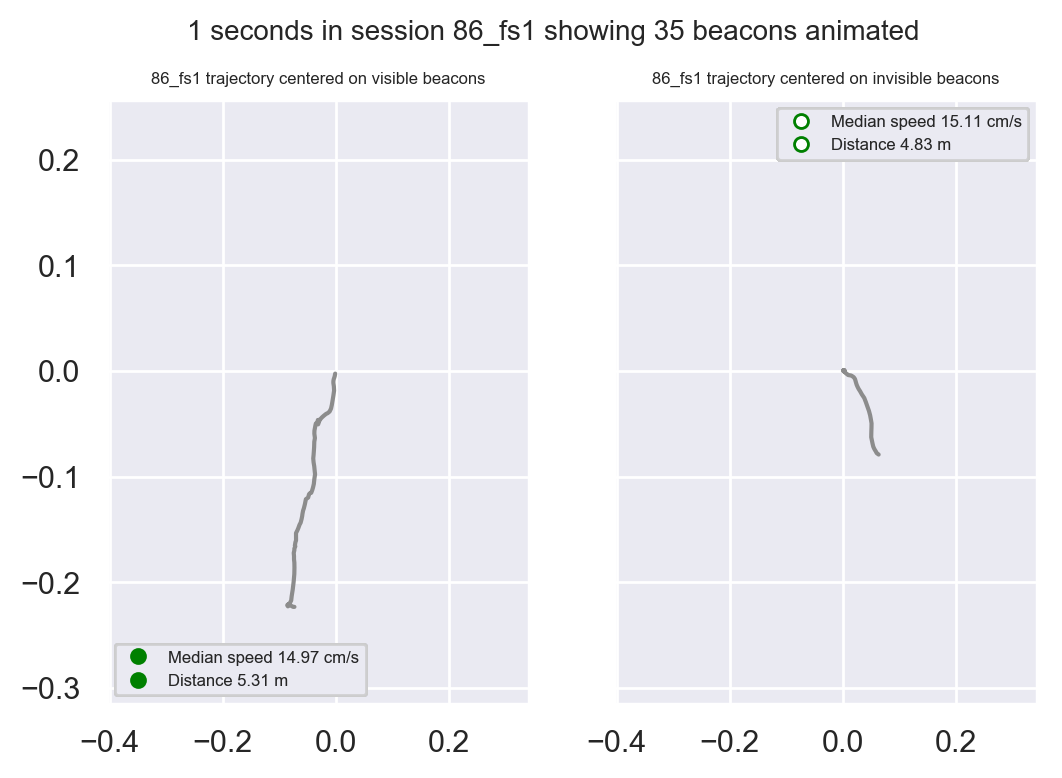

In [92]:
Beacon_centered_trajectories_animated ('86_fs1',Day86_fs1,beacon_Day86_fs1,seconds_back=1,height=False)

### TODO: 
    Clean up code! (DONE)
    Check at what point beacon actually trigered (DONE) = recorded after 1.5 seconds of being in the beacon... 

### more data imports - need ot run first 

In [91]:
beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)

beacon_Day87_fs2 = pd.read_csv(root+'beacons 20200129-153534.txt',sep=" ", header=None)
beacon_Day87_fs1 = pd.read_csv(root+'beacons 20200129-161806.txt',sep=" ", header=None)

beacon_Day88_fs2 = pd.read_csv(root+'beacons 20200130-102126.txt',sep=" ", header=None)
beacon_Day88_fs1 = pd.read_csv(root+'beacons 20200130-111741.txt',sep=" ", header=None)

beacon_Day89_fs2 = pd.read_csv(root+'beacons 20200130-161126.txt',sep=" ", header=None)
beacon_Day89_fs1 = pd.read_csv(root+'beacons 20200130-151829.txt',sep=" ", header=None)

beacon_Day90_fs2 = pd.read_csv(root+'beacons 20200203-154441.txt',sep=" ", header=None)
beacon_Day90_fs1 = pd.read_csv(root+'beacons 20200203-145842.txt',sep=" ", header=None)

beacon_Day91_fs2 = pd.read_csv(root+'beacons 20200204-125552.txt',sep=" ", header=None)
beacon_Day91_fs1 = pd.read_csv(root+'beacons 20200204-133905.txt',sep=" ", header=None)

beacon_Day92_fs2 = pd.read_csv(root+'beacons 20200205-143220.txt',sep=" ", header=None)
beacon_Day92_fs1 = pd.read_csv(root+'beacons 20200205-151052.txt',sep=" ", header=None)

beacon_Day93_fs2 = pd.read_csv(root+'beacons 20200206-133529.txt',sep=" ", header=None)
beacon_Day93_fs1 = pd.read_csv(root+'beacons 20200206-125706.txt',sep=" ", header=None)

Day46_fs1 = pd.read_csv(root+'position 20190923-174441.txt',sep=" ", header=None)
Day46_fs2 = pd.read_csv(root+'position 20190923-171112.txt',sep=" ", header=None)
Day47_fs1 = pd.read_csv(root+'position 20191001-112411.txt',sep=" ", header=None)
Day47_fs2 = pd.read_csv(root+'position 20191001-115127.txt',sep=" ", header=None)
Day48_fs1 = pd.read_csv(root+'position 20191002-115000.txt',sep=" ", header=None)
Day48_fs2 = pd.read_csv(root+'position 20191002-111038.txt',sep=" ", header=None)
Day51_fs1 = pd.read_csv(root+'position 20191106-170809.txt',sep=" ", header=None)
Day52_fs2 = pd.read_csv(root+'position 20191107-174215.txt',sep=" ", header=None)
Day52_fs1 = pd.read_csv(root+'position 20191107-183857.txt',sep=" ", header=None)
Day53_fs2 = pd.read_csv(root+'position 20191108-142321.txt',sep=" ", header=None)
Day53_fs1 = pd.read_csv(root+'position 20191108-145125.txt',sep=" ", header=None)
Day66_fs1 = pd.read_csv(root+'position 20191118-161325.txt',sep=" ", header=None)
Day66_fs2 = pd.read_csv(root+'position 20191118-171209.txt',sep=" ", header=None)
Day72_fs1 = pd.read_csv(root+'position 20191127-122008.txt',sep=" ", header=None)
Day72_fs2 = pd.read_csv(root+'position 20191127-132223.txt',sep=" ", header=None)


Day79_fs2 = pd.read_csv(root+'position 20200121-154004.txt',sep=" ", header=None)
Day79_fs1 = pd.read_csv(root+'position 20200121-161359.txt',sep=" ", header=None)

Day80_fs2 = pd.read_csv(root+'position 20200122-141738.txt',sep=" ", header=None)
Day80_fs1 = pd.read_csv(root+'position 20200122-133022.txt',sep=" ", header=None)

Day81_fs2 = pd.read_csv(root+'position 20200123-141930.txt',sep=" ", header=None)
Day81_fs1 = pd.read_csv(root+'position 20200123-150059.txt',sep=" ", header=None)

Day82_fs2 = pd.read_csv(root+'position 20200124-151642.txt',sep=" ", header=None)
Day82_fs1 = pd.read_csv(root+'position 20200124-160826.txt',sep=" ", header=None)

Day83_fs2 = pd.read_csv(root+'position 20200126-183810.txt',sep=" ", header=None)
Day83_fs1 = pd.read_csv(root+'position 20200126-180200.txt',sep=" ", header=None)

Day84_fs2 = pd.read_csv(root+'position 20200127-205615.txt',sep=" ", header=None)
Day84_fs1 = pd.read_csv(root+'position 20200127-155645.txt',sep=" ", header=None)

Day85_fs2 = pd.read_csv(root+'position 20200128-112255.txt',sep=" ", header=None)
Day85_fs1 = pd.read_csv(root+'position 20200128-104637.txt',sep=" ", header=None)

Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

Day87_fs2 = pd.read_csv(root+'position 20200129-153534.txt',sep=" ", header=None)
Day87_fs1 = pd.read_csv(root+'position 20200129-161806.txt',sep=" ", header=None)

Day88_fs2 = pd.read_csv(root+'position 20200130-102126.txt',sep=" ", header=None)
Day88_fs1 = pd.read_csv(root+'position 20200130-111741.txt',sep=" ", header=None)

Day89_fs2 = pd.read_csv(root+'position 20200130-161126.txt',sep=" ", header=None)
Day89_fs1 = pd.read_csv(root+'position 20200130-151829.txt',sep=" ", header=None)

Day90_fs2 = pd.read_csv(root+'position 20200203-154441.txt',sep=" ", header=None)
Day90_fs1 = pd.read_csv(root+'position 20200203-145842.txt',sep=" ", header=None)

Day91_fs2 = pd.read_csv(root+'position 20200204-125552.txt',sep=" ", header=None)
Day91_fs1 = pd.read_csv(root+'position 20200204-133905.txt',sep=" ", header=None)

Day92_fs2 = pd.read_csv(root+'position 20200205-143220.txt',sep=" ", header=None)
Day92_fs1 = pd.read_csv(root+'position 20200205-151052.txt',sep=" ", header=None)

Day93_fs2 = pd.read_csv(root+'position 20200206-133529.txt',sep=" ", header=None)
Day93_fs1 = pd.read_csv(root+'position 20200206-125706.txt',sep=" ", header=None)